In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
wine_data = pd.read_csv("https://raw.githubusercontent.com/SayaliD6/Datasets_used_in_assignments/main/wine_PCA.csv")

In [3]:
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Exploratory Data Analysis (EDA)

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<Axes: >

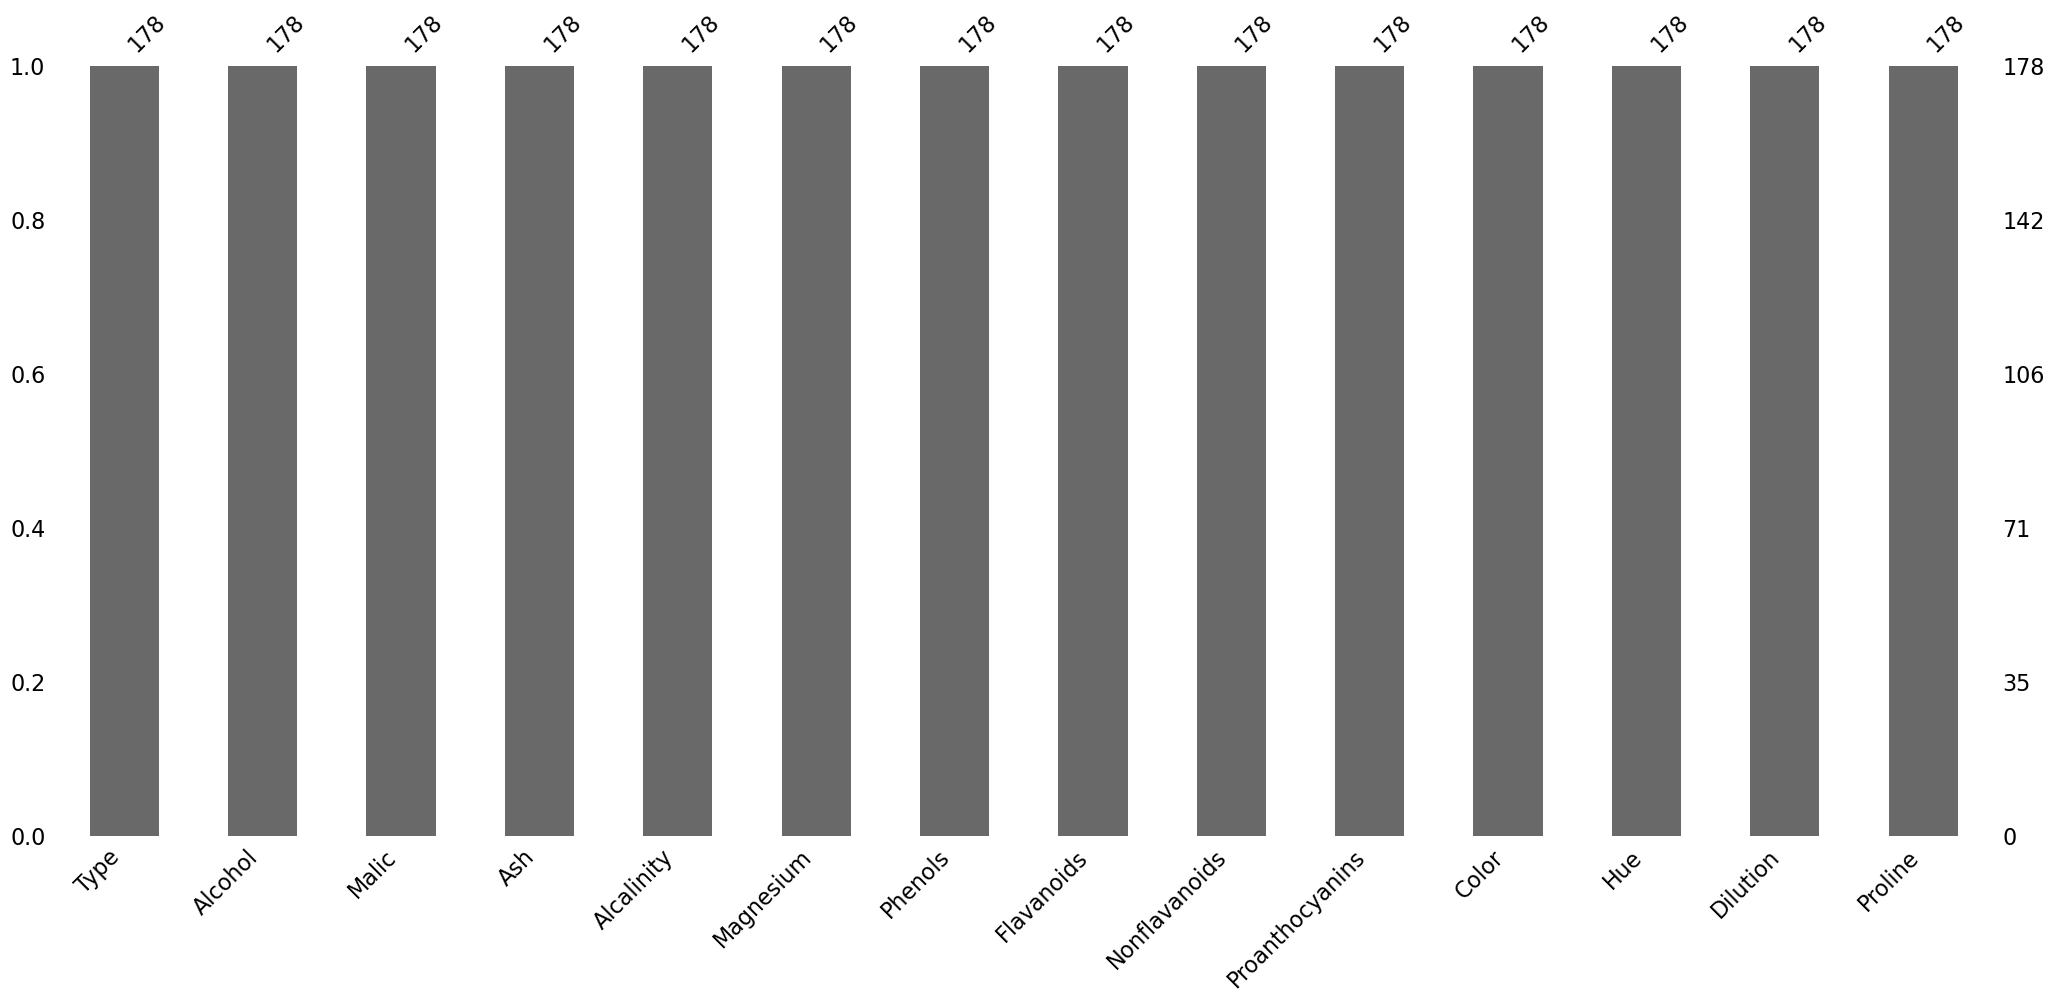

In [5]:
msno.bar(wine_data)

In [6]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


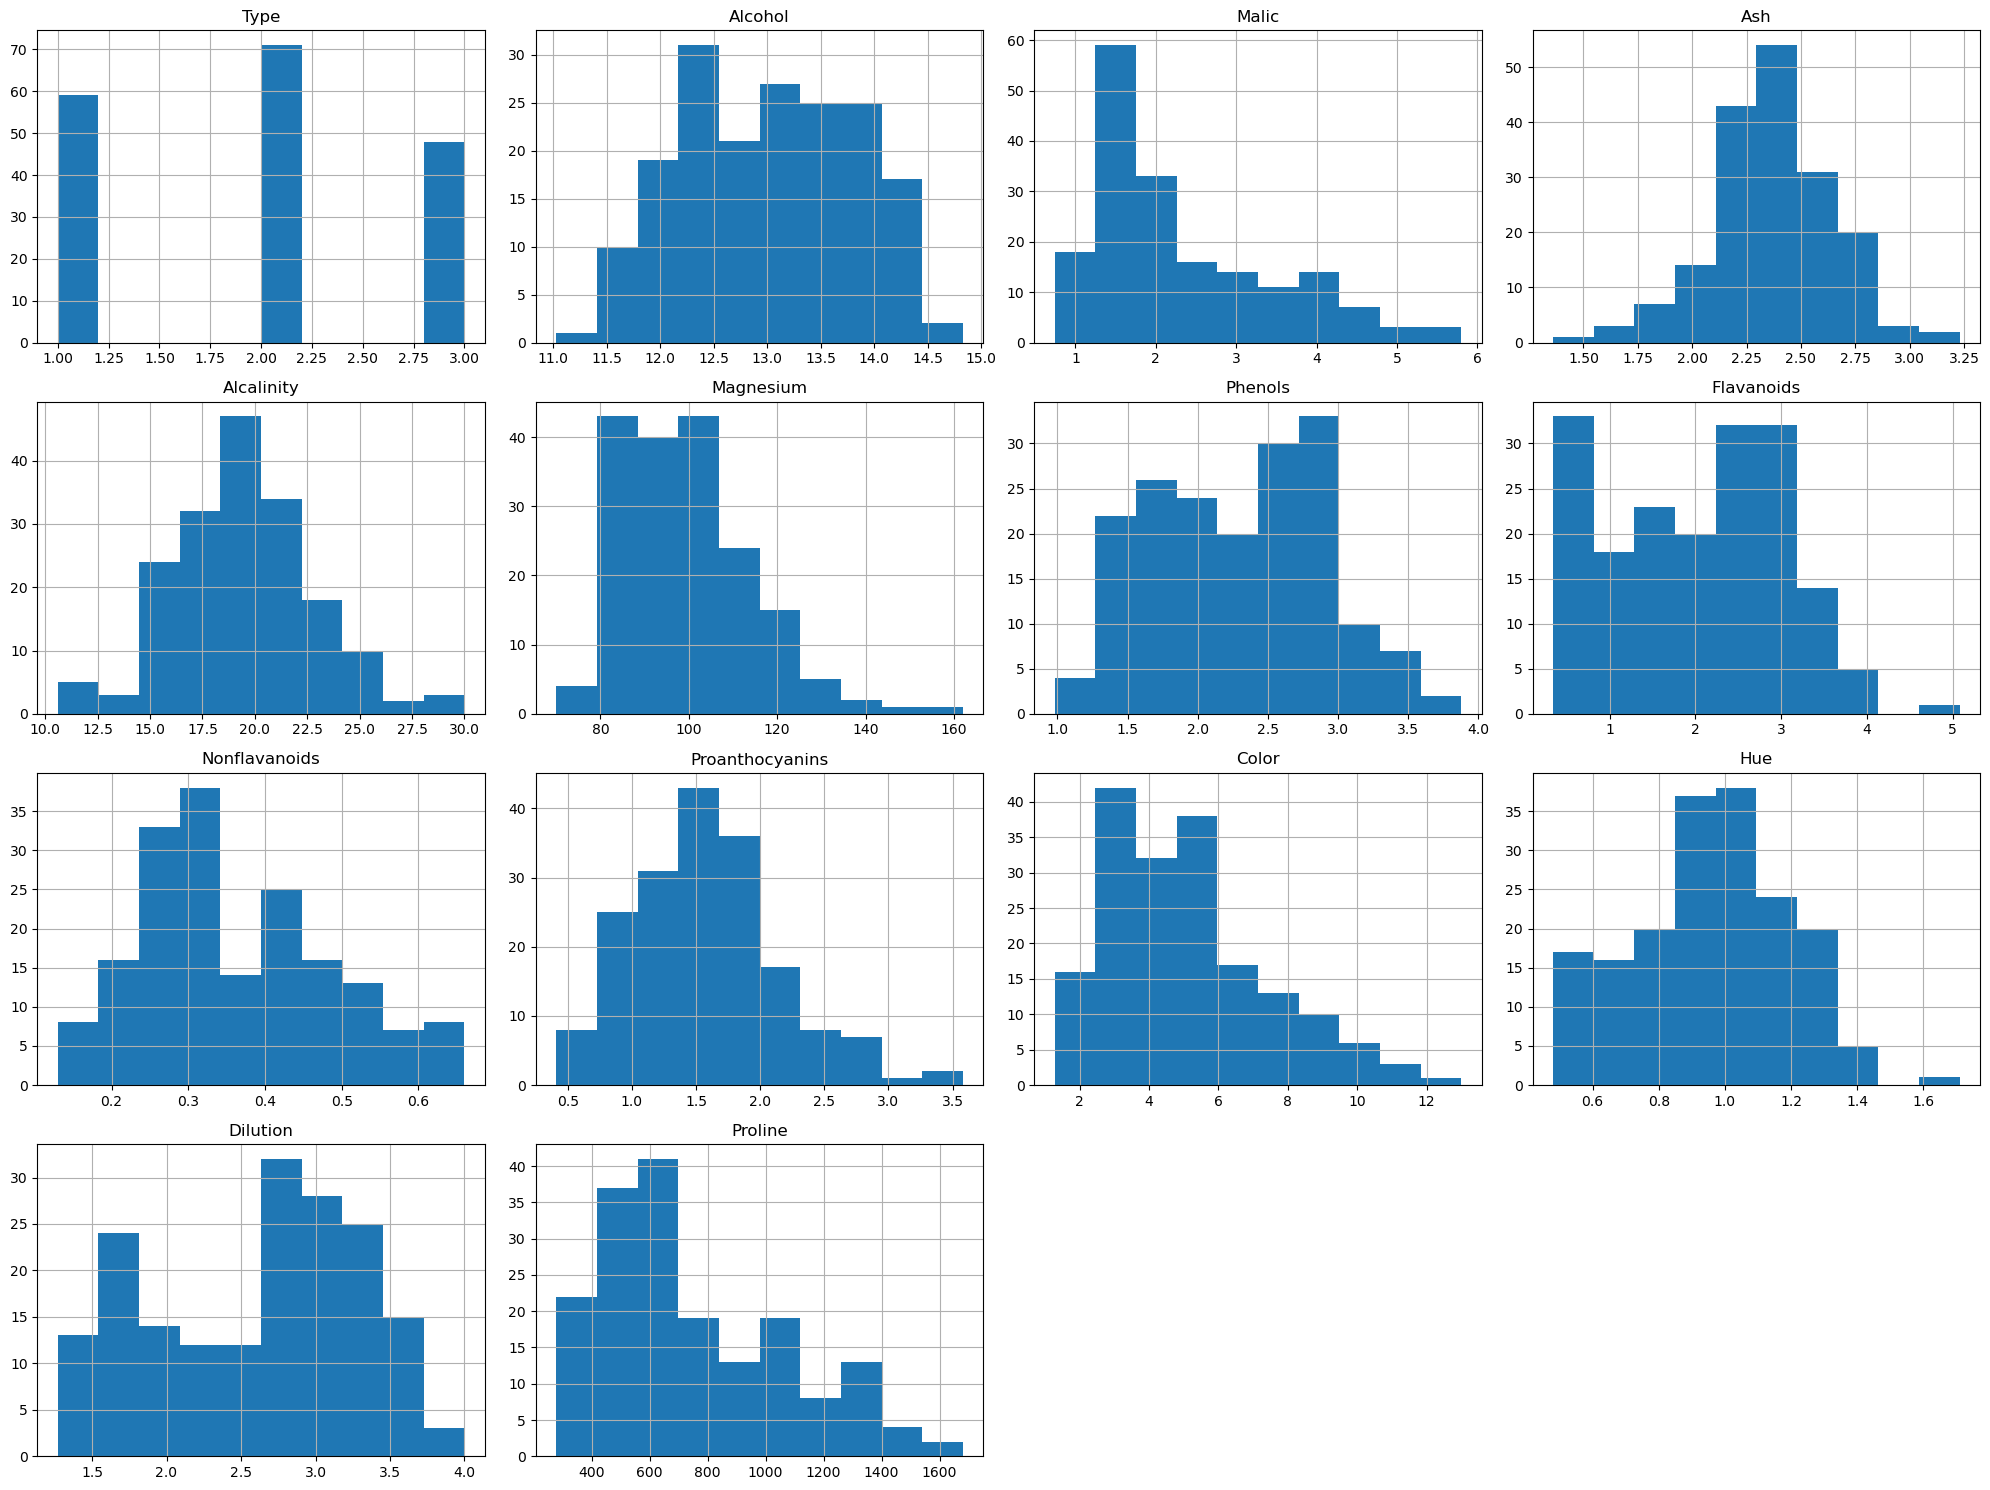

In [7]:
wine_data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

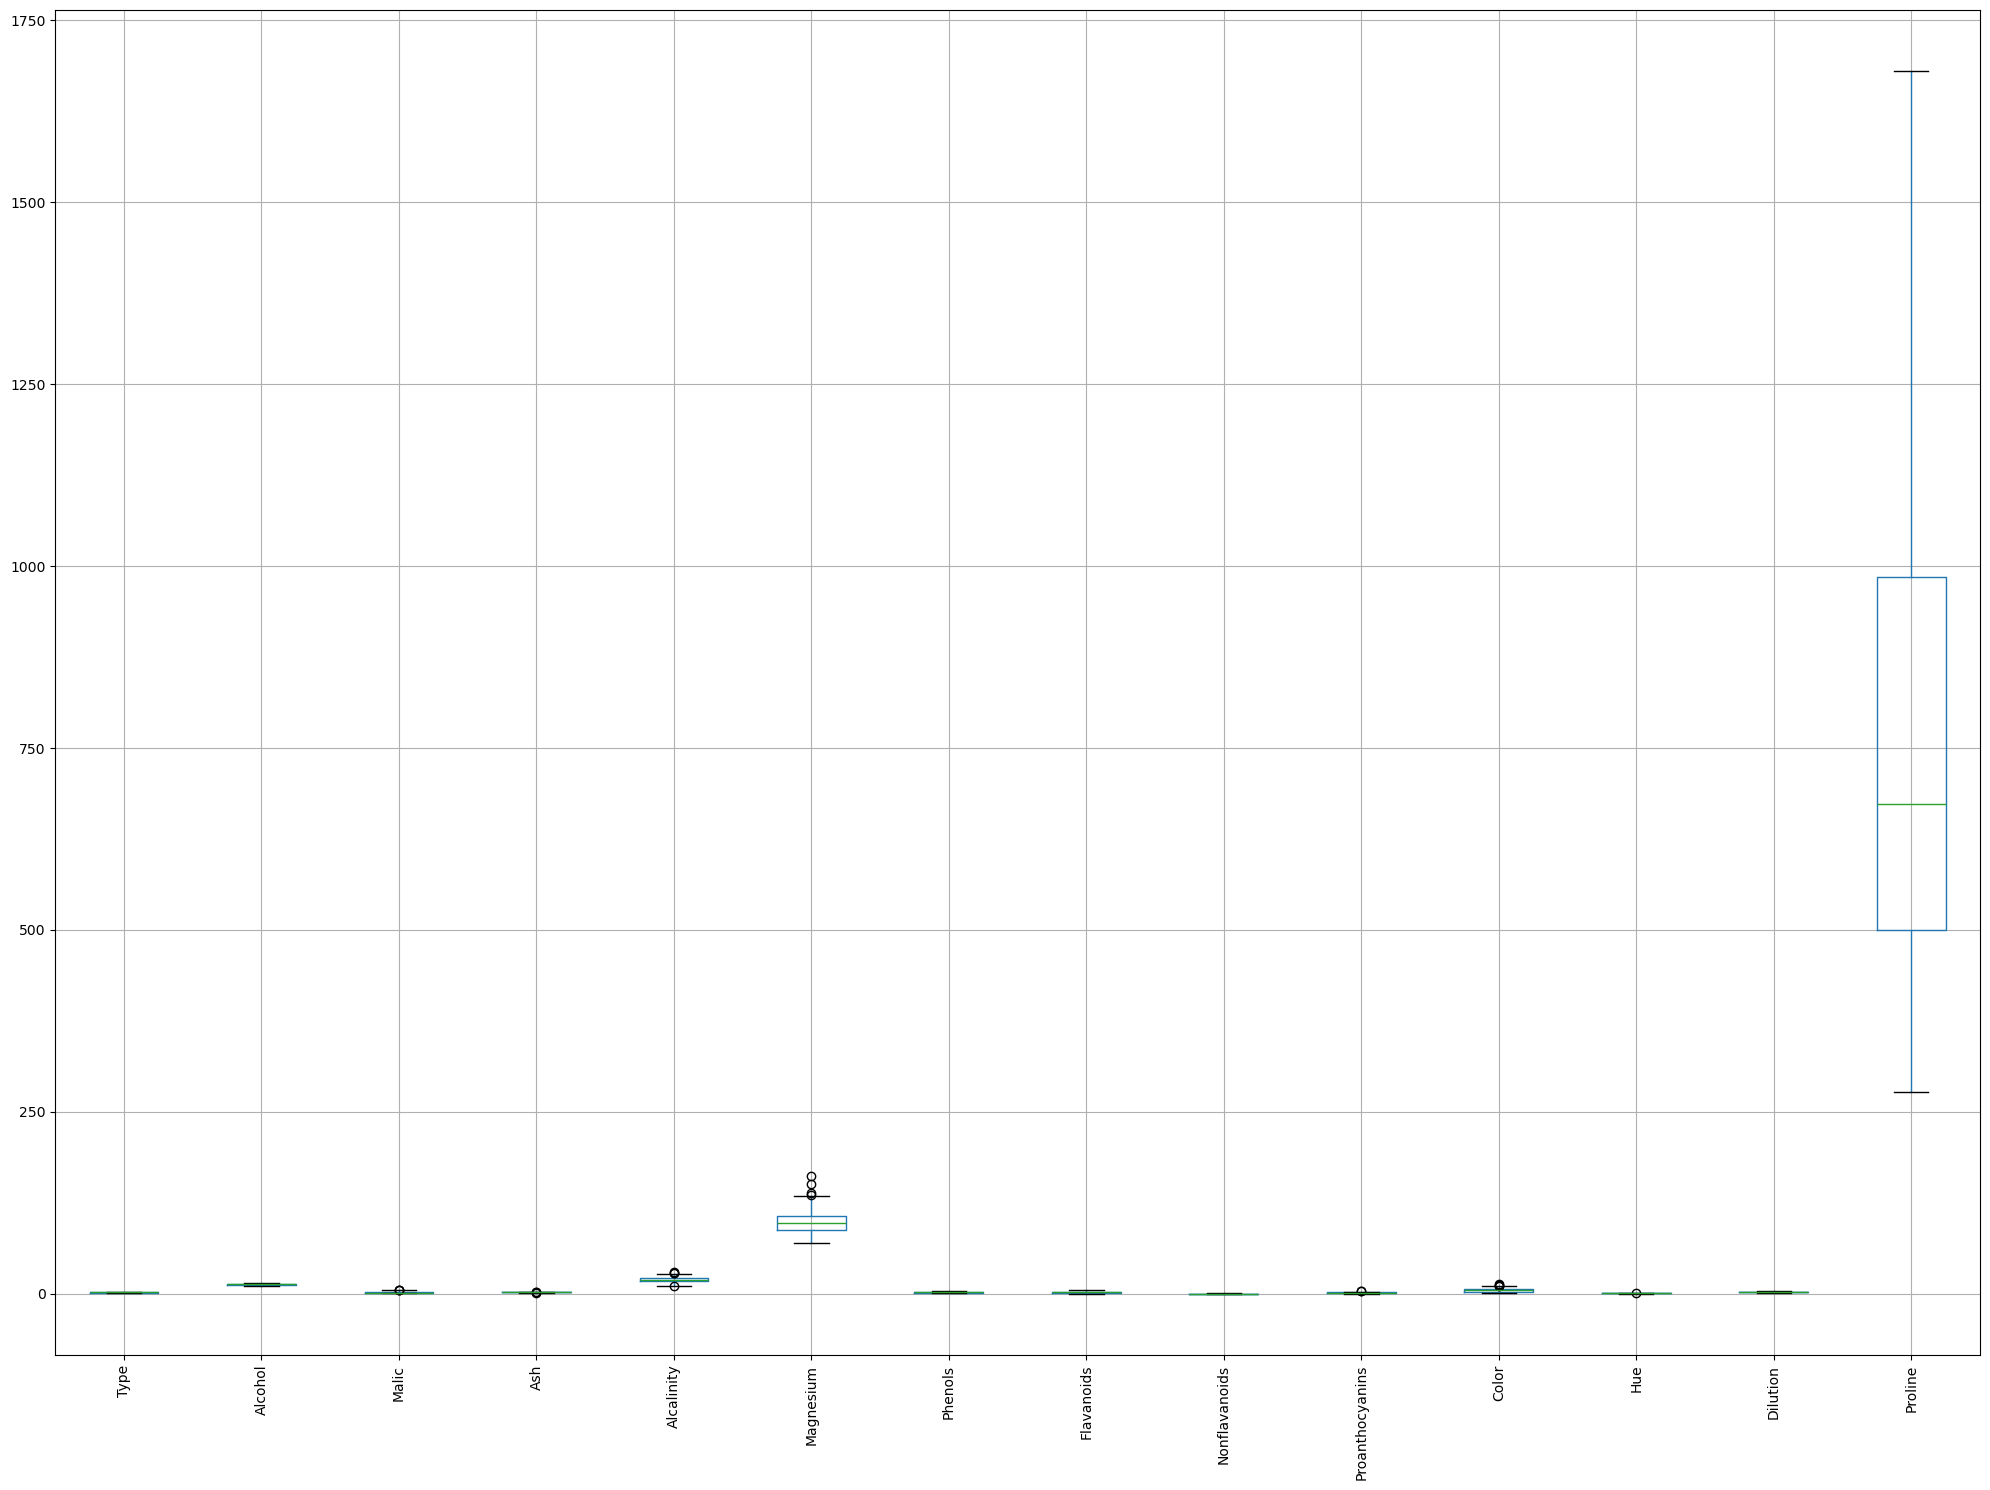

In [8]:
plt.figure(figsize=(20, 15))
wine_data.boxplot()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
wine_data.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


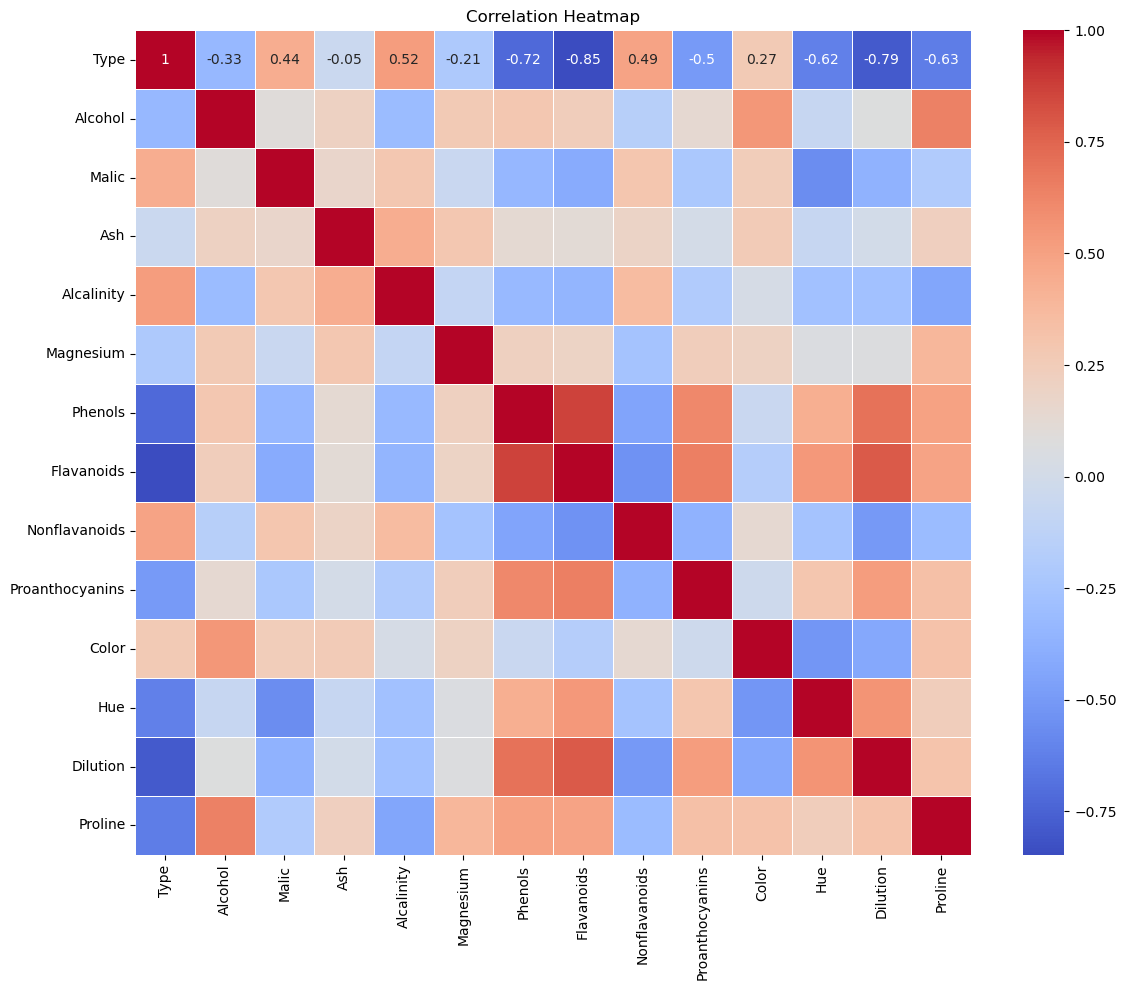

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### Some features have quite high linear correaltion: 
* flavanoids / total phenols 0.86
* flavanoids / od280/od315_of_diluted_wines 0.79
* For example, if features reduction is needed, I can keep only flavanoids and not use the other two.

### Some features separate quite well the classes. 
* For example, Proline seems to be a quite explicative variable itself, especially for wine 0 (blue dots).
* Also color intensity, coupled with total phenols or flavanoids separates quite well the classes. I could eventually apply dimensionality reduction( for example with PCA we could reduce feature minimizing the loss of information).

## Dimensionality Reduction with PCA

In [11]:
X = wine_data.drop('Type', axis=1)
y = wine_data['Type']

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Implement PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#### Determine the optimal number of principal components:

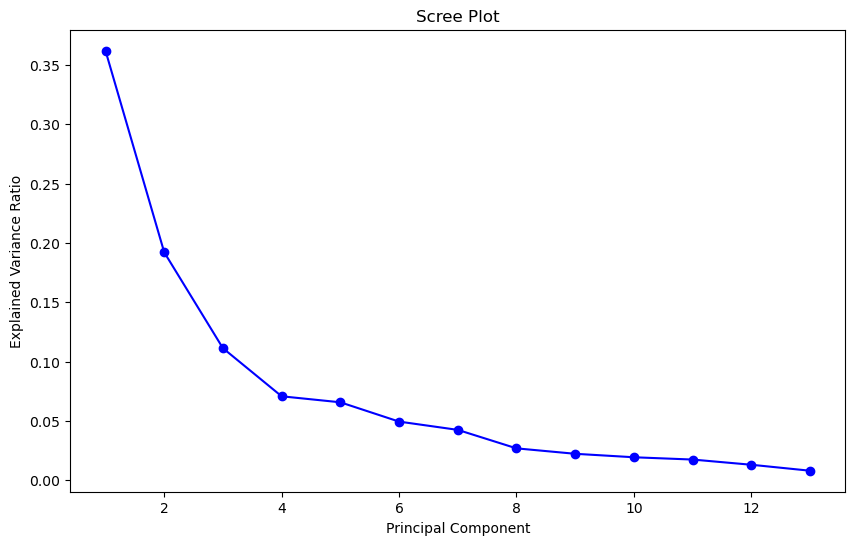

In [14]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

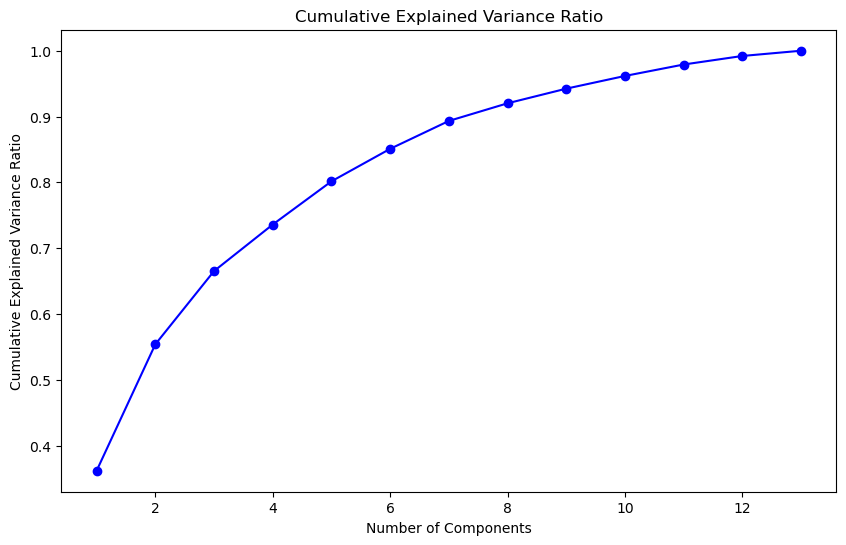

In [15]:
# Cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

#### Transform the original dataset into the principal components:

In [16]:
# Choose the number of components (e.g., 5)
n_components = 5
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

## Clustering with Original Data

In [17]:
# Determine optimal number of clusters using elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

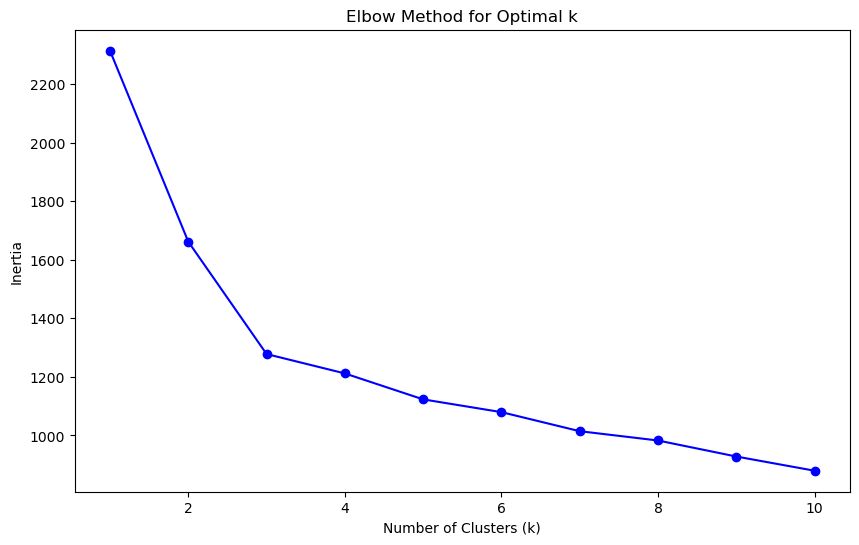

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [19]:
# Apply K-means with optimal k (e.g., k=3)
kmeans_original = KMeans(n_clusters=3, random_state=42)
cluster_labels_original = kmeans_original.fit_predict(X_scaled)

#### Visualize the clustering results

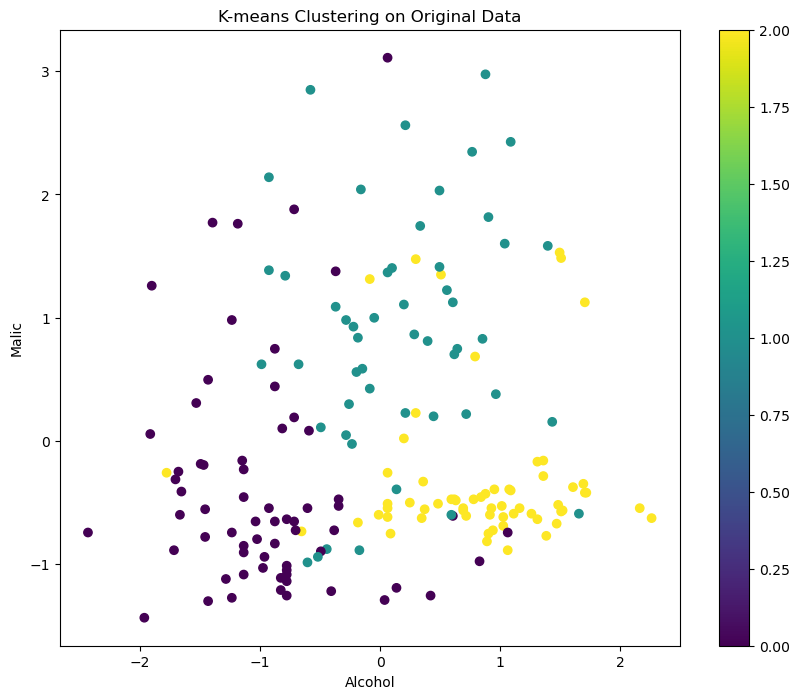

In [20]:
# Visualize clusters using first two features
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels_original, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('K-means Clustering on Original Data')
plt.show()

#### Evaluate the clustering performance

In [21]:
silhouette_orig = silhouette_score(X_scaled, cluster_labels_original)
davies_bouldin_orig = davies_bouldin_score(X_scaled, cluster_labels_original)
print(f"Silhouette Score (Original): {silhouette_orig}")
print(f"Davies-Bouldin Index (Original): {davies_bouldin_orig}")

Silhouette Score (Original): 0.2848589191898987
Davies-Bouldin Index (Original): 1.389187977718165


## Clustering with PCA Data

In [22]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(X_pca_final)

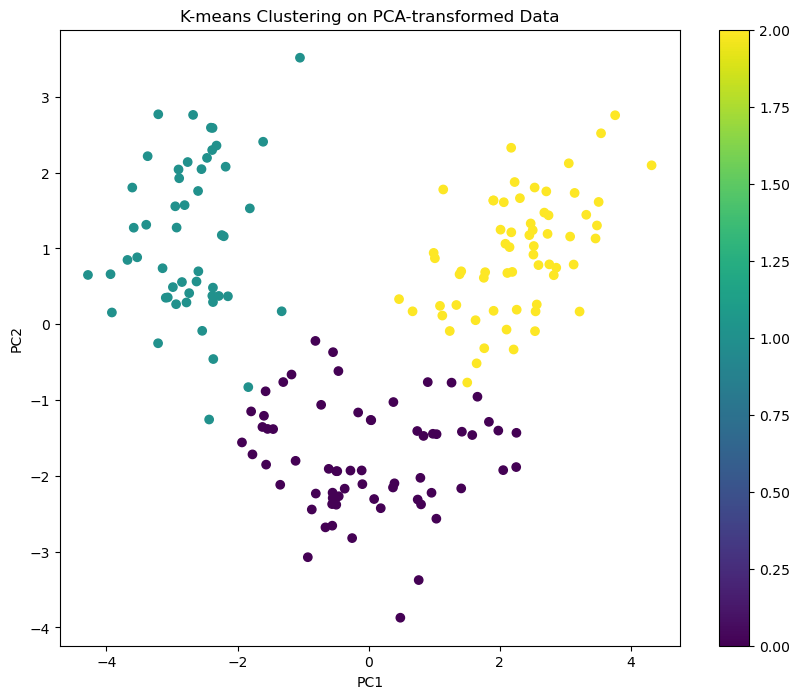

In [23]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=cluster_labels_pca, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering on PCA-transformed Data')
plt.show()

#### Compare clustering results:

In [24]:
silhouette_pca = silhouette_score(X_pca_final, cluster_labels_pca)
davies_bouldin_pca = davies_bouldin_score(X_pca_final, cluster_labels_pca)
print(f"Silhouette Score (PCA): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA): {davies_bouldin_pca}")

Silhouette Score (PCA): 0.3690763194699229
Davies-Bouldin Index (PCA): 1.0932987882612908


## Analysis:

* Silhouette Score (0.3690): Indicates moderately well-defined clusters.
* Davies-Bouldin Index (1.0932): Suggests fairly distinct clusters with some overlap.

## Conclusion:

* Clustering shows moderate effectiveness on PCA-transformed data.
* PCA successfully captured important variations in the wine dataset.
* Clusters are distinguishable but not perfectly separated.

## Insights:

* Wine dataset has complex, overlapping features.
* PCA likely identified key features for wine classification.
* Room for potential optimization in clustering approach.
* Results applicable for wine quality assessment or fraud detection.
* Trade-off between interpretability (PCA) and potential information loss.
* Domain expertise needed for full result interpretation.
* Clustering provides a foundation for further wine data analysis.
* These concise points summarize the key takeaways from the clustering analysis on the PCA-transformed wine dataset.